In [ ]:
!pip install pandas-profiling==2.7.1
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv ('/content/loan_data.csv')

In [ ]:
df2 = pd.get_dummies(df, columns=['purpose'])

In [ ]:
df2.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
#Needed libraries for understanding the correlations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

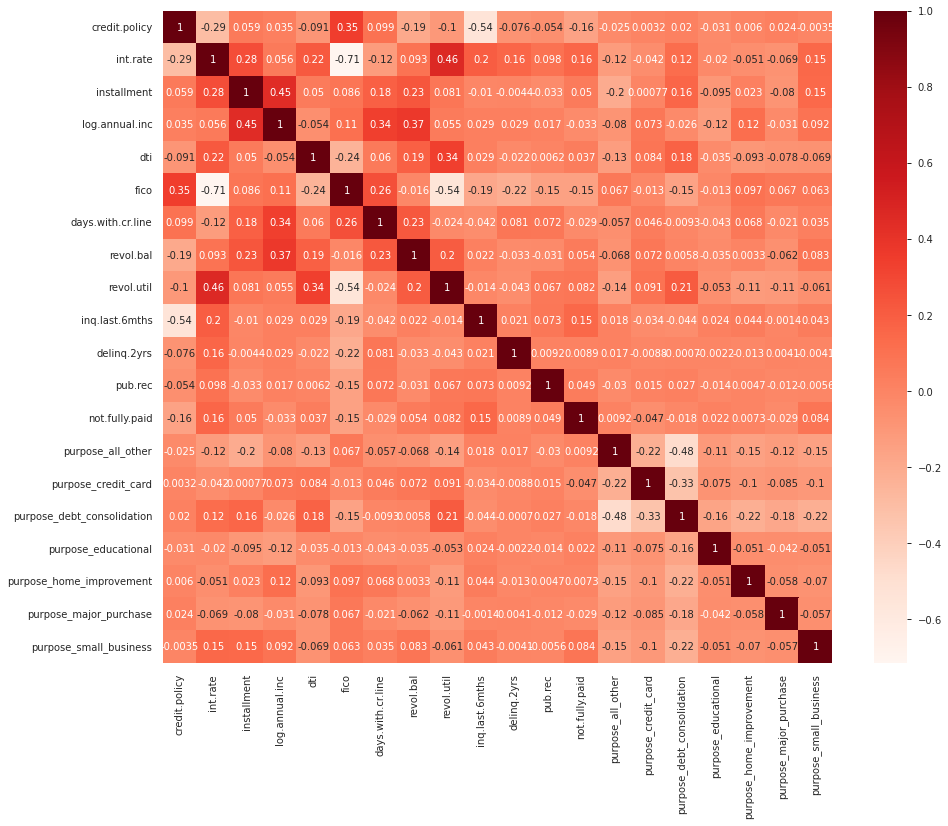

In [ ]:
#Let's generate a heat map of the correlations (I put the numbers in the box)
plt.figure(figsize=(15,12))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#We can also use the function ProfileReport which is part of Pandas to do the
#exploretary analysis:

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df2)

In [ ]:
#By looking at 'not.fully.paid' we can see that the data is imbalaned. 
#After some reading, and also it was mentioned in the class
#it is possible to deal with it using different methods,
#however since it was not required in the assisment statememnt then I won't 
#try to fix it.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
#After reading, and since I'm using google colab I figured out to make PlotLossKeras work for me.
try:
    import torchbearer
except:
    !pip install -q torchbearer
    import torchbearer

!pip install livelossplot
print(torchbearer.__version__)

In [ ]:
from livelossplot import PlotLossesKeras

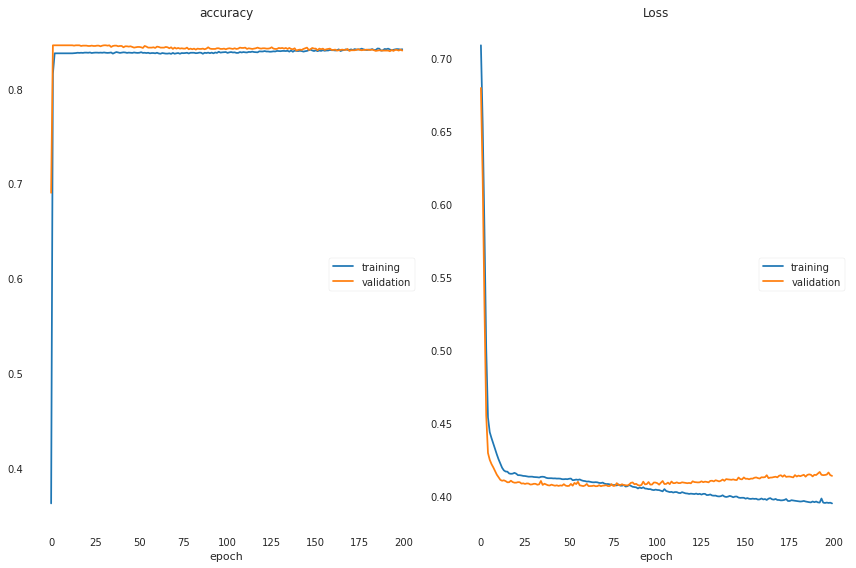

accuracy
	training         	 (min:    0.363, max:    0.842, cur:    0.842)
	validation       	 (min:    0.690, max:    0.846, cur:    0.840)
Loss
	training         	 (min:    0.395, max:    0.709, cur:    0.395)
	validation       	 (min:    0.407, max:    0.680, cur:    0.414)


In [ ]:
to_train = df2[df2['not.fully.paid'].isin([0,1])]
to_pred = df2[df2['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Let's try this model (which I call model1) first,
model1 = Sequential()

model1.add(
        Dense(19, activation='relu')
)

model1.add(
        Dense(10, activation='relu')
)

model1.add(
        Dense(5, activation='relu')
)


model1.add(
        Dense(1, activation='sigmoid')
)

model1.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

model1.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[PlotLossesKeras()]
)

In [ ]:
#not looking very good. 
#Let's add drop out to see if we get an imporved model. And add precision and recall to metrics

In [ ]:
from keras.metrics import Precision, Recall

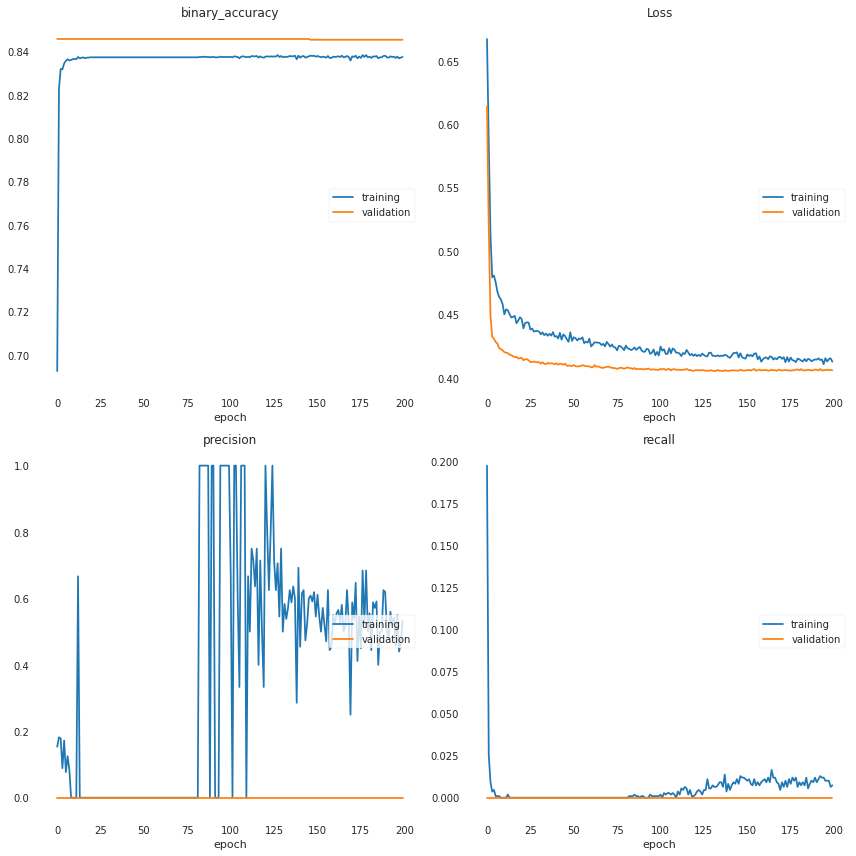

binary_accuracy
	training         	 (min:    0.693, max:    0.838, cur:    0.838)
	validation       	 (min:    0.846, max:    0.846, cur:    0.846)
Loss
	training         	 (min:    0.411, max:    0.667, cur:    0.413)
	validation       	 (min:    0.405, max:    0.614, cur:    0.406)
precision
	training         	 (min:    0.000, max:    1.000, cur:    0.533)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
recall
	training         	 (min:    0.000, max:    0.197, cur:    0.007)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)


In [ ]:

model2= Sequential()

model2.add(
        Dense(19, activation='relu')
)

model2.add(Dropout(0.2))

model2.add(
        Dense(10, activation='relu')
)

model2.add(Dropout(0.2))

model2.add(
        Dense(5, activation='relu')
)

model2.add(Dropout(0.2))

model2.add(
        Dense(1, activation='sigmoid')
)

model2.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy',Precision(),Recall()]
)


model2.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[PlotLossesKeras()]
)

In [ ]:
#It's better but the imbalance in the data seem to be casuing issues.